Plot data generated by fig4-simulations.ipynb.

Created on: 04/05/21

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast
import numpy as np

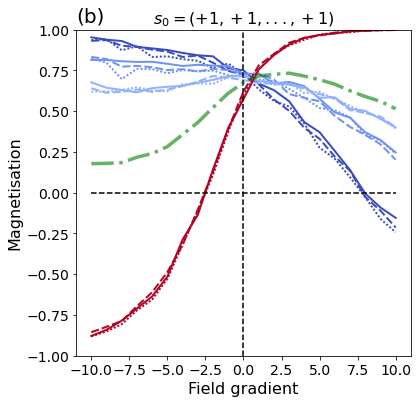

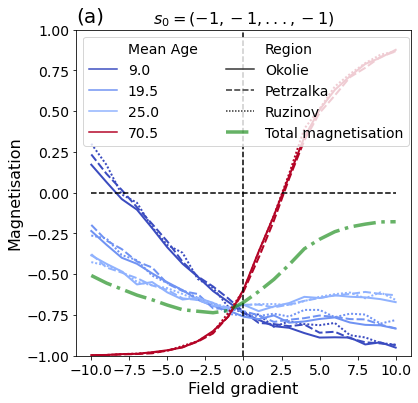

In [2]:
for init_sign in [1.0,-1.0] :


    df=pd.read_csv(f"Data/block_magnetisations_{init_sign}".replace('.','-') +".csv")
    block_data = pd.read_csv('Data/block_info.csv',converters={'Block' : ast.literal_eval}).rename(columns={'Unnamed: 0':'block'})
    df=df.merge(block_data,on='block',how='left')

    df['region']=df['block_name'].apply(lambda x : x.split('_')[0])
    df=df.rename(columns={'average_age':'Mean Age','region':'Region'})

    grad_vals =  np.arange(-10.0,11.0,1.0)


    fig,ax=plt.subplots(figsize=(6,6))
    sns.lineplot(data=df,x='gradient',y='mag',hue='Mean Age',palette='coolwarm',style='Region',lw=2.0)
    plt.plot(grad_vals,np.zeros(len(grad_vals)),'k--')
    plt.plot([0.0,0.0],[-1,1],'k--')
    
    
    # Add in average magnetisaiton of whole system
    N=np.sum(list(set(df['block_size'].to_list()))) # total nodes
    df['total_block_mag']=df['mag']*df['block_size']
    average_mag_df = df.groupby(['beta_factor','gradient']).agg({'total_block_mag':np.sum}).reset_index()
    average_mag_df['total_avg_mag']=average_mag_df['total_block_mag']/N
    
    plt.plot(average_mag_df['gradient'].to_list(),
             average_mag_df['total_avg_mag'].to_list(),
             'g-.',lw=3.5,alpha=0.6,label='Total magnetisation')
    
    
    

    plt.ylim(-1,1)
    if init_sign==-1.0:
        plt.legend(ncol=2,loc='upper left',fontsize=14)
        plt.title("$s_0=(-1,-1,...,-1)$",fontsize=16)
        plt.text(-11,1.05,"(a)",fontsize=20)
    elif init_sign==1.0:
        plt.legend([],[], frameon=False)
        plt.title("$s_0=(+1,+1,...,+1)$",fontsize=16)
        plt.text(-11,1.05,"(b)",fontsize=20)

    plt.xlabel("Field gradient",fontsize=16)
    plt.ylabel("Magnetisation",fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.savefig(f"Plots/Pokec_block_mags_{init_sign}".replace('.','-')+".pdf",bbox_inches='tight')